#import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

#import dataset

In [ ]:
rowData=pd.read_csv("/content/Dataset.csv")
rowData.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
rowData.shape

(145460, 24)

In [ ]:
# Split the data into train as "data" and test sets as "tdata"
data, tdata = train_test_split(rowData, test_size=0.2, random_state=42)

# Check the sizes of the resulting splits
print(f"Train data size: {data.shape}")
print(f"Test data size: {tdata.shape}")

Train data size: (116368, 24)
Test data size: (29092, 24)


#Preprocessing train dataset

*   List item
*   List item



In [ ]:
#this column is useless
data=data.drop(['Unnamed: 0'], axis=1)

In [ ]:
# extracting the Month out of the date
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Name_of_Month']=data['Month']

season_mapping = {
                  1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                  7:'July', 8:'August', 9:'September', 10:'October', 11:'November',12:'December'
                 }

data['Name_of_Month'] = data['Name_of_Month'].map(season_mapping)
data=data.drop( ['Date','Month'] , axis=1 )
data.head()


,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Name_of_Month
111548,Station 1,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1024.1,1022.5,8.0,NaN,16.2,NaN,Yes,Yes,April
142528,Station 16,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,NW,...,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,No,No,October
65304,Station 19,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,No,No,February
40651,Station 45,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,SSE,...,67.0,1017.0,1016.5,6.0,NaN,23.0,25.4,No,No,February
97487,Station 0,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,...,47.0,1018.6,1017.1,NaN,NaN,14.4,18.3,No,No,October


In [ ]:
# extracting the 0 , 1 out of the rain day
YesNo_mapping = {
                  'No': 0 , 'Yes': 1
                 }
data['Rain that day'] = data['Rain that day'].map(YesNo_mapping)
data['Rain the day after'] = data['Rain the day after'].map(YesNo_mapping)
data.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Name_of_Month
111548,Station 1,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1024.1,1022.5,8.0,NaN,16.2,NaN,1.0,1.0,April
142528,Station 16,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,NW,...,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,0.0,0.0,October
65304,Station 19,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,0.0,0.0,February
40651,Station 45,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,SSE,...,67.0,1017.0,1016.5,6.0,NaN,23.0,25.4,0.0,0.0,February
97487,Station 0,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,...,47.0,1018.6,1017.1,NaN,NaN,14.4,18.3,0.0,0.0,October


##feature selection & one-hot encoding

In [ ]:
featureSelectionData=data.copy()
featureSelectionData.dropna(how='any', inplace=True)
featureSelectionData.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Name_of_Month
65304,Station 19,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,0.0,0.0,February
103132,Station 28,4.9,10.3,0.0,0.6,1.2,W,26.0,SSW,W,...,68.0,1030.2,1026.0,8.0,8.0,7.8,9.6,0.0,0.0,August
95882,Station 39,22.3,27.6,11.6,9.4,0.4,SE,43.0,SSW,SSE,...,91.0,1016.4,1015.2,7.0,8.0,22.7,24.5,1.0,1.0,April
85224,Station 7,20.8,29.0,0.0,9.4,7.5,ENE,26.0,ENE,ENE,...,61.0,1016.4,1012.6,7.0,4.0,27.4,27.9,0.0,0.0,November
139941,Station 13,23.6,32.2,4.8,5.6,3.0,ENE,39.0,SSE,NNE,...,59.0,1010.7,1007.3,7.0,8.0,27.9,30.9,1.0,1.0,October


In [ ]:
featureSelectionData.shape

(45083, 23)

In [ ]:
featureSelectionData.isnull().any()

Weather Station                 False
Minimum Temperature             False
Maximum Temperature             False
Rainfall                        False
Evaporation                     False
Sunshine                        False
Gust Trajectory                 False
Air Velocity                    False
Gust Trajectory at  9 AM        False
Gust Trajectory at  3 PM        False
Air Velocity at  9 AM           False
Air Velocity at  3 PM           False
Moisture Level at 9 AM          False
Moisture Level at 3 PM          False
Atmospheric Pressure at 9 AM    False
Atmospheric Pressure at 3 PM    False
Cloudiness at 9 AM              False
Cloudiness at 3 PM              False
Recorded Temperature at 9 AM    False
Recorded Temperature at 3 PM    False
Rain that day                   False
Rain the day after              False
Name_of_Month                   False
dtype: bool

In [ ]:
# distinction is based on the type of the values
columns = list(featureSelectionData.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    arr=featureSelectionData[i].unique()
    if isinstance(arr[0], str):
        categoric_columns.append(i)
    else:
        numeric_columns.append(i)
print(categoric_columns)
print(numeric_columns)

['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Name_of_Month']
['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM', 'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM', 'Rain that day', 'Rain the day after']


In [ ]:
#one-hot encoding for categoric_columns
ohe = OneHotEncoder( handle_unknown='ignore' , sparse_output = False ).set_output(transform='pandas')
ohetransform = ohe.fit_transform(featureSelectionData[categoric_columns])
ohetransform

,Weather Station_Station 10,Weather Station_Station 11,Weather Station_Station 13,Weather Station_Station 15,Weather Station_Station 18,Weather Station_Station 19,Weather Station_Station 20,Weather Station_Station 21,Weather Station_Station 22,Weather Station_Station 27,...,Name_of_Month_December,Name_of_Month_February,Name_of_Month_January,Name_of_Month_July,Name_of_Month_June,Name_of_Month_March,Name_of_Month_May,Name_of_Month_November,Name_of_Month_October,Name_of_Month_September
65304,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
139941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
103694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
131932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
featureSelectionData = pd.concat( [featureSelectionData , ohetransform] , axis=1).drop(columns=categoric_columns)
featureSelectionData.head()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,...,Name_of_Month_December,Name_of_Month_February,Name_of_Month_January,Name_of_Month_July,Name_of_Month_June,Name_of_Month_March,Name_of_Month_May,Name_of_Month_November,Name_of_Month_October,Name_of_Month_September
65304,14.7,26.6,0.2,3.2,8.0,30.0,7.0,11.0,87.0,57.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103132,4.9,10.3,0.0,0.6,1.2,26.0,9.0,15.0,67.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95882,22.3,27.6,11.6,9.4,0.4,43.0,19.0,24.0,94.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85224,20.8,29.0,0.0,9.4,7.5,26.0,7.0,9.0,57.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
139941,23.6,32.2,4.8,5.6,3.0,39.0,15.0,19.0,66.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
featureSelectionData.shape

(45083, 104)

In [ ]:
X = featureSelectionData.drop(['Rain the day after'], axis = 1)
y = featureSelectionData['Rain the day after']

In [ ]:
#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_scaled, y)


DecisionTreeClassifier()

In [ ]:
# Determine feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                         Feature  Importance
9         Moisture Level at 3 PM    0.271415
4                       Sunshine    0.095573
11  Atmospheric Pressure at 3 PM    0.076350
5                   Air Velocity    0.052712
8         Moisture Level at 9 AM    0.035948
..                           ...         ...
39    Weather Station_Station 48    0.000828
19    Weather Station_Station 13    0.000709
42     Weather Station_Station 9    0.000656
17    Weather Station_Station 10    0.000564
28     Weather Station_Station 3    0.000537

[103 rows x 2 columns]


In [ ]:
threshold = feature_importances['Importance'].mean()

# Filter the feature names where importances are greater than the threshold
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Convert to list if needed
important_features_list = important_features.tolist()

important_features_list = important_features.tolist()

print("Important features:", important_features_list)

Important features: ['Moisture Level at 3 PM', 'Sunshine', 'Atmospheric Pressure at 3 PM', 'Air Velocity', 'Moisture Level at 9 AM', 'Atmospheric Pressure at 9 AM', 'Minimum Temperature', 'Evaporation', 'Recorded Temperature at 9 AM', 'Rainfall', 'Air Velocity at  9 AM', 'Recorded Temperature at 3 PM', 'Maximum Temperature', 'Air Velocity at  3 PM', 'Cloudiness at 3 PM', 'Cloudiness at 9 AM']


In [ ]:
# Get the names of the 4 most important features
top_features = feature_importances['Feature'].head(4).values
print("\nTop 4 Features:", top_features)



Top 4 Features: ['Moisture Level at 3 PM' 'Sunshine' 'Atmospheric Pressure at 3 PM'
 'Air Velocity']


In [ ]:
# Add "Rain the day after" to the list
new_column_name = "Rain the day after"
selected_columns = important_features_list.copy()
selected_columns.append(new_column_name)

print("Selected columns:", selected_columns)

Selected columns: ['Moisture Level at 3 PM', 'Sunshine', 'Atmospheric Pressure at 3 PM', 'Air Velocity', 'Moisture Level at 9 AM', 'Atmospheric Pressure at 9 AM', 'Minimum Temperature', 'Evaporation', 'Recorded Temperature at 9 AM', 'Rainfall', 'Air Velocity at  9 AM', 'Recorded Temperature at 3 PM', 'Maximum Temperature', 'Air Velocity at  3 PM', 'Cloudiness at 3 PM', 'Cloudiness at 9 AM', 'Rain the day after']


In [ ]:
# Drop the columns that are not in the selected_columns list
data= data[selected_columns]
data.head()

,Moisture Level at 3 PM,Sunshine,Atmospheric Pressure at 3 PM,Air Velocity,Moisture Level at 9 AM,Atmospheric Pressure at 9 AM,Minimum Temperature,Evaporation,Recorded Temperature at 9 AM,Rainfall,Air Velocity at 9 AM,Recorded Temperature at 3 PM,Maximum Temperature,Air Velocity at 3 PM,Cloudiness at 3 PM,Cloudiness at 9 AM,Rain the day after
111548,NaN,NaN,1022.5,NaN,94.0,1024.1,14.5,NaN,16.2,14.2,0.0,NaN,17.8,NaN,NaN,8.0,1.0
142528,21.0,NaN,1006.6,31.0,52.0,1011.8,24.6,12.0,30.1,0.0,9.0,39.2,39.5,17.0,4.0,2.0,0.0
65304,57.0,8.0,1015.4,30.0,87.0,1018.2,14.7,3.2,17.3,0.2,7.0,24.5,26.6,11.0,3.0,7.0,0.0
40651,67.0,NaN,1016.5,28.0,79.0,1017.0,18.3,NaN,23.0,0.0,11.0,25.4,26.6,22.0,NaN,6.0,0.0
97487,47.0,8.9,1017.1,31.0,63.0,1018.6,11.4,2.4,14.4,0.6,13.0,18.3,19.3,19.0,NaN,NaN,0.0


In [ ]:
data.shape

(116368, 17)

In [ ]:
data.isnull().any()

Moisture Level at 3 PM          True
Sunshine                        True
Atmospheric Pressure at 3 PM    True
Air Velocity                    True
Moisture Level at 9 AM          True
Atmospheric Pressure at 9 AM    True
Minimum Temperature             True
Evaporation                     True
Recorded Temperature at 9 AM    True
Rainfall                        True
Air Velocity at  9 AM           True
Recorded Temperature at 3 PM    True
Maximum Temperature             True
Air Velocity at  3 PM           True
Cloudiness at 3 PM              True
Cloudiness at 9 AM              True
Rain the day after              True
dtype: bool

In [ ]:
data.isnull().sum()/len(data)*100

Moisture Level at 3 PM           3.107383
Sunshine                        48.073353
Atmospheric Pressure at 3 PM    10.348206
Air Velocity                     7.048329
Moisture Level at 9 AM           1.819229
Atmospheric Pressure at 9 AM    10.364533
Minimum Temperature              1.012306
Evaporation                     43.249863
Recorded Temperature at 9 AM     1.207377
Rainfall                         2.237729
Air Velocity at  9 AM            1.209955
Recorded Temperature at 3 PM     2.489516
Maximum Temperature              0.857624
Air Velocity at  3 PM            2.111405
Cloudiness at 3 PM              40.860030
Cloudiness at 9 AM              38.461605
Rain the day after               2.240307
dtype: float64

In [ ]:
data=data.bfill()
data=data.ffill()
data.isnull().any()

Moisture Level at 3 PM          False
Sunshine                        False
Atmospheric Pressure at 3 PM    False
Air Velocity                    False
Moisture Level at 9 AM          False
Atmospheric Pressure at 9 AM    False
Minimum Temperature             False
Evaporation                     False
Recorded Temperature at 9 AM    False
Rainfall                        False
Air Velocity at  9 AM           False
Recorded Temperature at 3 PM    False
Maximum Temperature             False
Air Velocity at  3 PM           False
Cloudiness at 3 PM              False
Cloudiness at 9 AM              False
Rain the day after              False
dtype: bool

In [ ]:
print('Number of duplicated values in dataset: ', data.duplicated().sum())


Number of duplicated values in dataset:  160


###Correlation Heatmap

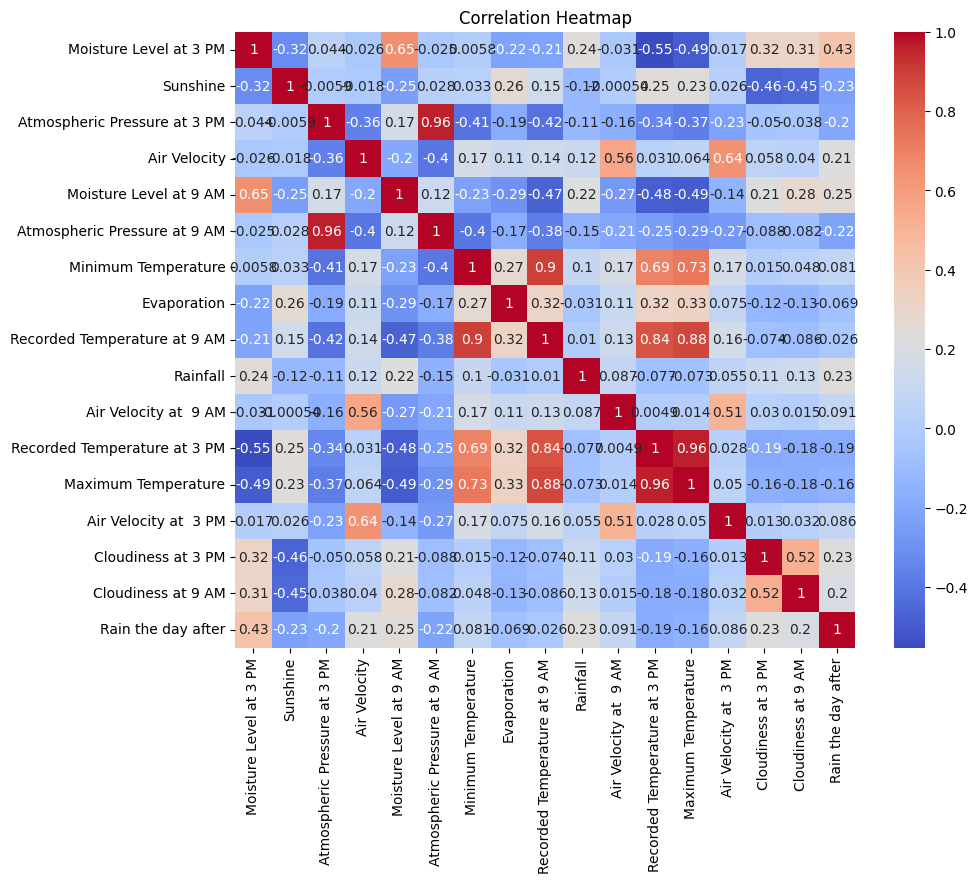

In [ ]:
newDF= data[selected_columns]
correlation_matrix = newDF.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
visualizationData=data.copy() #use visualizationData for visualizing the data
#drop Recorded 'Temperature at 9 AM', 'Recorded Temperature at 3 PM',''Atmospheric Pressure at 9 AM' becuase they have correlation with other features
data=data.drop(['Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM','Atmospheric Pressure at 9 AM'], axis=1)

#visualization

In [ ]:
visualizationData.head()

,Moisture Level at 3 PM,Sunshine,Atmospheric Pressure at 3 PM,Air Velocity,Moisture Level at 9 AM,Atmospheric Pressure at 9 AM,Minimum Temperature,Evaporation,Recorded Temperature at 9 AM,Rainfall,Air Velocity at 9 AM,Recorded Temperature at 3 PM,Maximum Temperature,Air Velocity at 3 PM,Cloudiness at 3 PM,Cloudiness at 9 AM,Rain the day after
111548,21.0,8.0,1022.5,31.0,94.0,1024.1,14.5,12.0,16.2,14.2,0.0,39.2,17.8,17.0,4.0,8.0,1.0
142528,21.0,8.0,1006.6,31.0,52.0,1011.8,24.6,12.0,30.1,0.0,9.0,39.2,39.5,17.0,4.0,2.0,0.0
65304,57.0,8.0,1015.4,30.0,87.0,1018.2,14.7,3.2,17.3,0.2,7.0,24.5,26.6,11.0,3.0,7.0,0.0
40651,67.0,8.9,1016.5,28.0,79.0,1017.0,18.3,2.4,23.0,0.0,11.0,25.4,26.6,22.0,8.0,6.0,0.0
97487,47.0,8.9,1017.1,31.0,63.0,1018.6,11.4,2.4,14.4,0.6,13.0,18.3,19.3,19.0,8.0,8.0,0.0


array([[<Axes: title={'center': 'Moisture Level at 3 PM'}>,
        <Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'Atmospheric Pressure at 3 PM'}>,
        <Axes: title={'center': 'Air Velocity'}>],
       [<Axes: title={'center': 'Moisture Level at 9 AM'}>,
        <Axes: title={'center': 'Atmospheric Pressure at 9 AM'}>,
        <Axes: title={'center': 'Minimum Temperature'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Recorded Temperature at 9 AM'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Air Velocity at  9 AM'}>,
        <Axes: title={'center': 'Recorded Temperature at 3 PM'}>],
       [<Axes: title={'center': 'Maximum Temperature'}>,
        <Axes: title={'center': 'Air Velocity at  3 PM'}>,
        <Axes: title={'center': 'Cloudiness at 3 PM'}>,
        <Axes: title={'center': 'Cloudiness at 9 AM'}>],
       [<Axes: title={'center': 'Rain the day after'}>, <Axes: >,
        <Ax

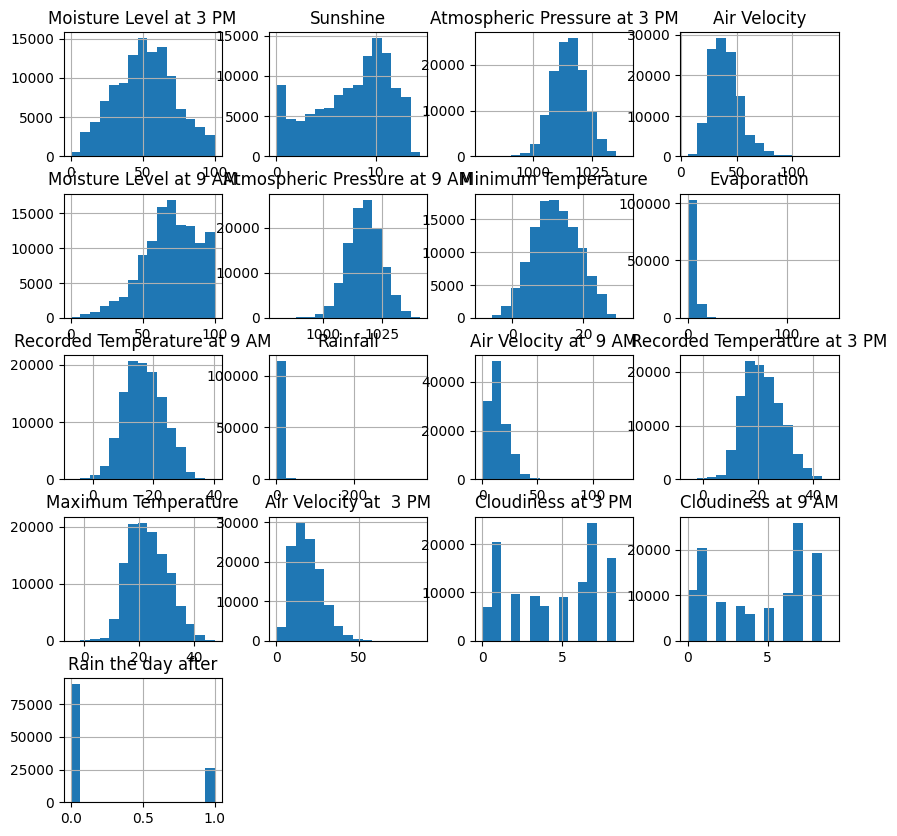

In [ ]:
visualizationData.hist( figsize = (10,10),bins = 15)

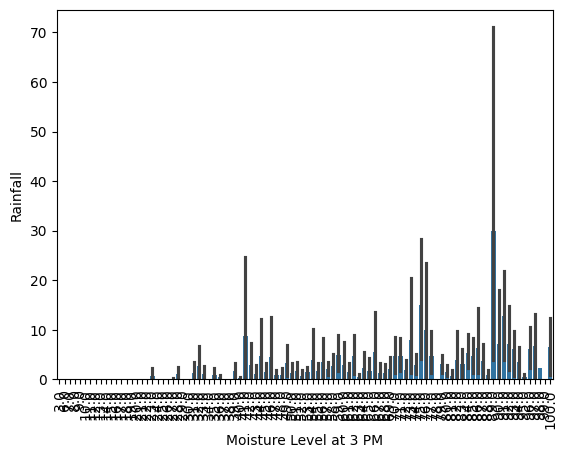

In [ ]:
sample = visualizationData.sample(n=1000)
sns.barplot(data=sample, x='Moisture Level at 3 PM',y='Rainfall')
# Rotate the x-axis labels vertically
plt.xticks(rotation=90)
plt.xlabel('Moisture Level at 3 PM')
plt.ylabel('Rainfall')
plt.show()

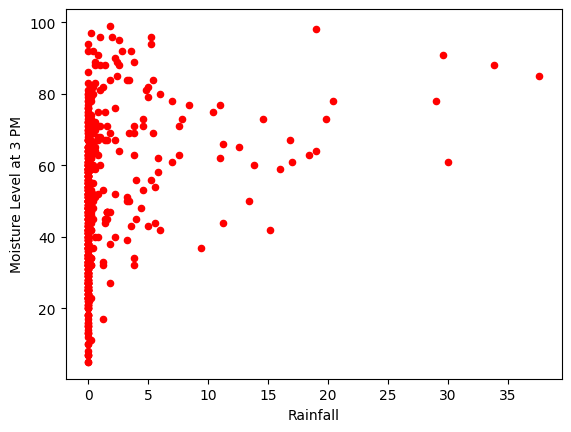

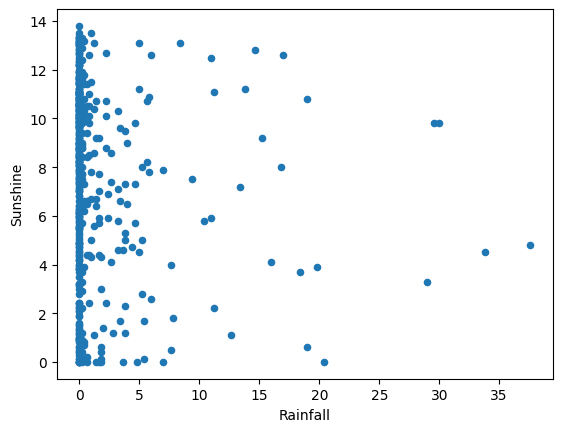

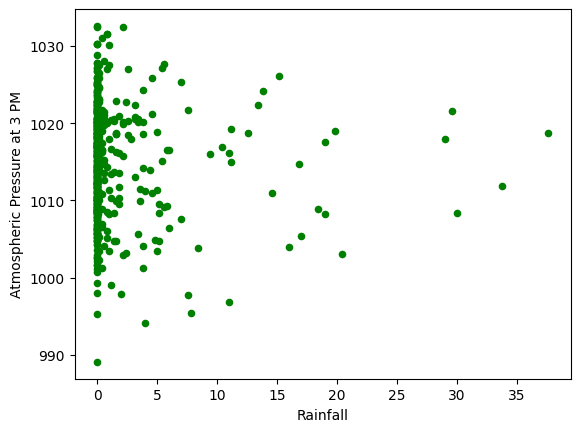

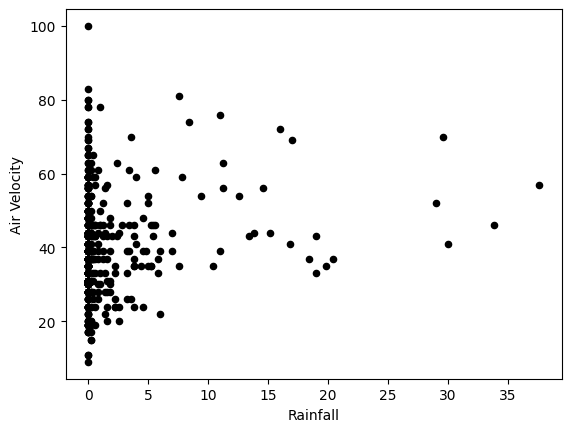

In [ ]:
sample = visualizationData.sample(n=500)
sample.plot.scatter(x = 'Rainfall', y = 'Moisture Level at 3 PM', c = 'red');
sample.plot.scatter(x='Rainfall', y='Sunshine');
sample.plot.scatter(x='Rainfall', y='Atmospheric Pressure at 3 PM',c='green');
sample.plot.scatter(x='Rainfall', y='Air Velocity',c='black');

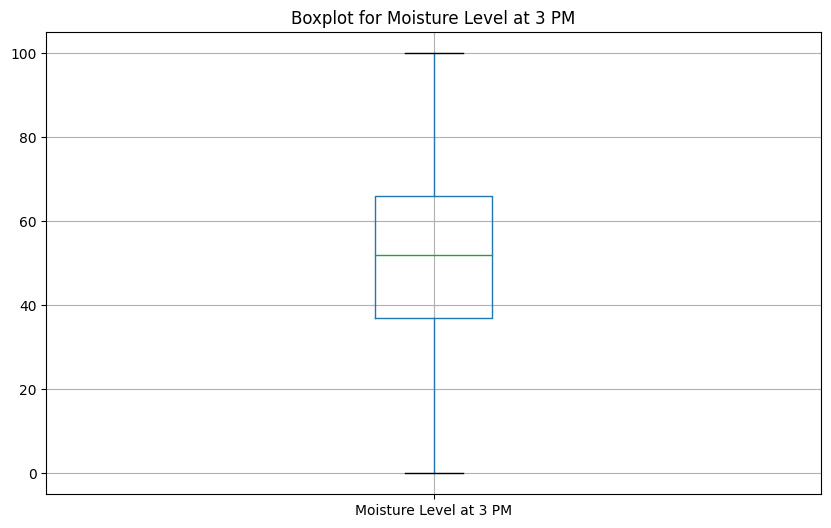

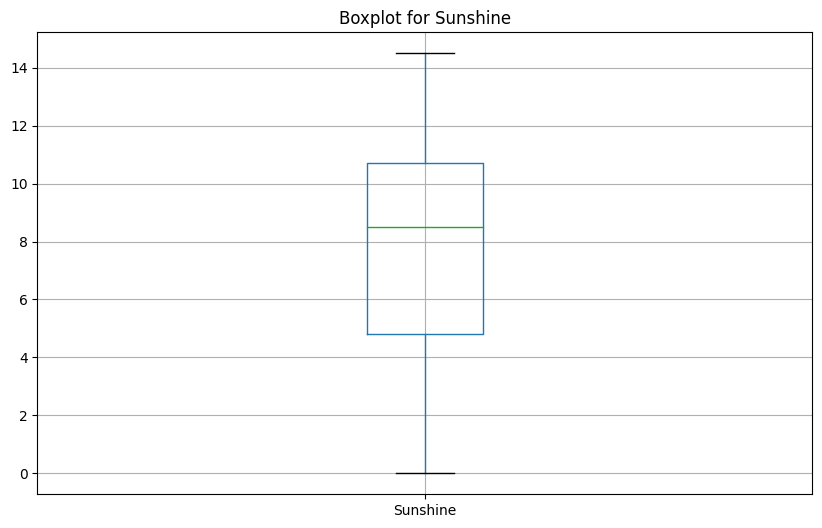

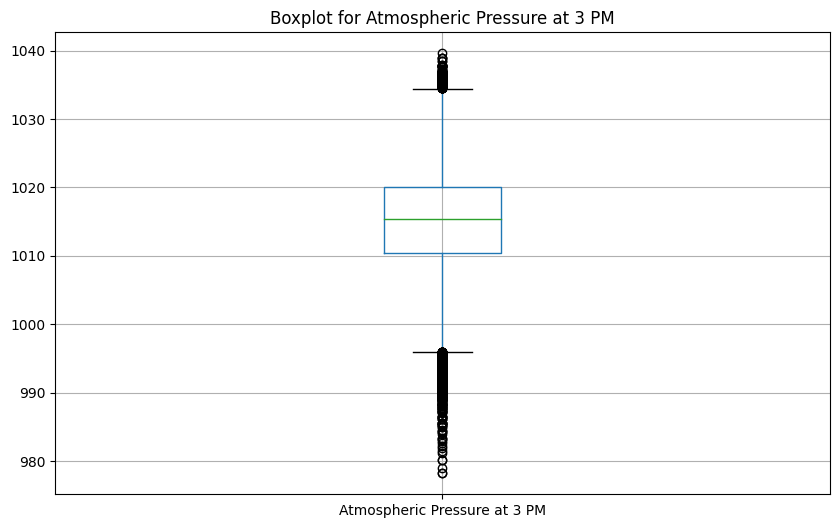

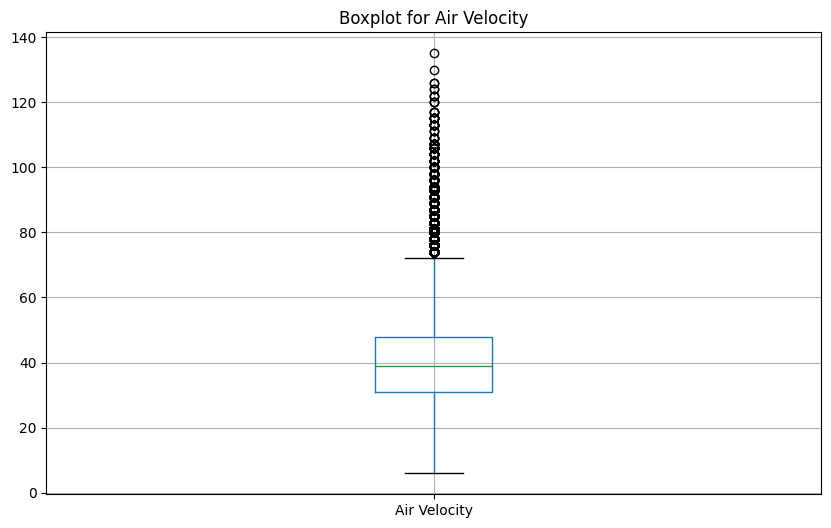

In [ ]:
# Draw boxplots for the 4 most important features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    visualizationData.boxplot(column=feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [ ]:
data.describe()

,Moisture Level at 3 PM,Sunshine,Atmospheric Pressure at 3 PM,Air Velocity,Moisture Level at 9 AM,Minimum Temperature,Evaporation,Rainfall,Air Velocity at 9 AM,Maximum Temperature,Air Velocity at 3 PM,Cloudiness at 3 PM,Cloudiness at 9 AM,Rain the day after
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,51.537029,7.619820,1015.252443,40.044901,68.901253,12.198948,5.457298,2.381610,14.053950,23.217573,18.662132,4.497370,4.453467,0.223799
std,20.780891,3.790086,7.047807,13.629266,19.022139,6.398157,4.154331,8.564815,8.916102,7.116115,8.812465,2.726238,2.888684,0.416790
min,0.000000,0.000000,978.200000,6.000000,0.000000,-8.500000,0.000000,0.000000,0.000000,-4.800000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,4.800000,1010.400000,31.000000,57.000000,7.600000,2.600000,0.000000,7.000000,17.900000,13.000000,2.000000,1.000000,0.000000
50%,52.000000,8.500000,1015.300000,39.000000,70.000000,12.000000,4.800000,0.000000,13.000000,22.600000,19.000000,5.000000,5.000000,0.000000
75%,66.000000,10.700000,1020.000000,48.000000,83.000000,16.900000,7.400000,0.800000,19.000000,28.200000,24.000000,7.000000,7.000000,0.000000
max,100.000000,14.500000,1039.600000,135.000000,100.000000,31.900000,145.000000,371.000000,130.000000,47.300000,87.000000,9.000000,9.000000,1.000000


In [ ]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
# Remove outliers from the top 4 features
for feature in top_features:
    data = remove_outliers(data, feature)

In [ ]:
# Verify the changes after removing outliers
print("After removing outliers:")
data.describe()

After removing outliers:


,Moisture Level at 3 PM,Sunshine,Atmospheric Pressure at 3 PM,Air Velocity,Moisture Level at 9 AM,Minimum Temperature,Evaporation,Rainfall,Air Velocity at 9 AM,Maximum Temperature,Air Velocity at 3 PM,Cloudiness at 3 PM,Cloudiness at 9 AM,Rain the day after
count,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000,113030.000000
mean,51.417261,7.647922,1015.464124,39.018721,68.947306,12.214625,5.449633,2.271049,13.749553,23.285503,18.325409,4.478802,4.436274,0.215483
std,20.670228,3.787407,6.744503,12.019690,18.957294,6.402917,4.139001,8.184380,8.539155,7.057337,8.409863,2.728711,2.891648,0.411159
min,0.000000,0.000000,996.000000,6.000000,0.000000,-8.500000,0.000000,0.000000,0.000000,-4.100000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,4.900000,1010.700000,31.000000,57.000000,7.600000,2.600000,0.000000,7.000000,18.000000,13.000000,2.000000,1.000000,0.000000
50%,52.000000,8.500000,1015.400000,37.000000,70.000000,12.000000,4.800000,0.000000,13.000000,22.700000,17.000000,5.000000,5.000000,0.000000
75%,65.000000,10.700000,1020.100000,46.000000,83.000000,16.900000,7.400000,0.600000,19.000000,28.300000,24.000000,7.000000,7.000000,0.000000
max,100.000000,14.500000,1034.400000,72.000000,100.000000,31.900000,145.000000,371.000000,130.000000,47.300000,83.000000,9.000000,9.000000,1.000000


In [ ]:
X_train=data.copy()
y_train= data['Rain the day after']
X_train= X_train.drop(['Rain the day after'], axis = 1)

#Handle class imbalance

In [ ]:
# Create SMOTE object
#smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Standardization


In [ ]:
#Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
#X_train_scaled = scaler.fit_transform(X_train_resampled,y_train_resampled)

#Preprocessing test dataset


In [ ]:
tdata=tdata.drop(['Unnamed: 0'], axis=1)

In [ ]:
# extracting the Month out of the date
tdata['Month'] = pd.DatetimeIndex(tdata['Date']).month
tdata['Name_of_Month']=tdata['Month']

season_mapping = {
                  1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                  7:'July', 8:'August', 9:'September', 10:'October', 11:'November',12:'December'
                 }

tdata['Name_of_Month'] = tdata['Name_of_Month'].map(season_mapping)
tdata=tdata.drop( ['Date','Month'] , axis=1 )
tdata.head()


,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Name_of_Month
100721,Station 22,15.0,18.9,4.2,6.6,8.0,NNW,54.0,NNW,NW,...,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,Yes,Yes,April
30234,Station 37,13.1,26.8,0.0,4.6,10.9,NaN,NaN,W,WNW,...,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,No,No,March
68427,Station 18,19.0,29.0,NaN,11.0,5.6,N,59.0,N,N,...,38.0,1006.5,1003.4,NaN,NaN,24.2,27.2,NaN,NaN,December
28624,Station 34,18.1,32.2,0.0,2.1,NaN,NE,30.0,NaN,NE,...,51.0,1019.2,1014.6,NaN,NaN,20.9,31.6,No,No,March
31173,Station 37,13.9,19.6,14.0,1.2,5.4,SSW,50.0,SW,S,...,64.0,NaN,1018.4,7.0,6.0,15.5,19.1,Yes,No,October


In [ ]:
# extracting the 0 , 1 out of the rain day
YesNo_mapping = {
                  'No': 0 , 'Yes': 1
                 }
tdata['Rain that day'] = tdata['Rain that day'].map(YesNo_mapping)
tdata['Rain the day after'] = tdata['Rain the day after'].map(YesNo_mapping)
tdata.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Name_of_Month
100721,Station 22,15.0,18.9,4.2,6.6,8.0,NNW,54.0,NNW,NW,...,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,1.0,1.0,April
30234,Station 37,13.1,26.8,0.0,4.6,10.9,NaN,NaN,W,WNW,...,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,0.0,0.0,March
68427,Station 18,19.0,29.0,NaN,11.0,5.6,N,59.0,N,N,...,38.0,1006.5,1003.4,NaN,NaN,24.2,27.2,NaN,NaN,December
28624,Station 34,18.1,32.2,0.0,2.1,NaN,NE,30.0,NaN,NE,...,51.0,1019.2,1014.6,NaN,NaN,20.9,31.6,0.0,0.0,March
31173,Station 37,13.9,19.6,14.0,1.2,5.4,SSW,50.0,SW,S,...,64.0,NaN,1018.4,7.0,6.0,15.5,19.1,1.0,0.0,October


In [ ]:
ohetransform = ohe.fit_transform(tdata[categoric_columns])
ohetransform

,Weather Station_Station 0,Weather Station_Station 1,Weather Station_Station 10,Weather Station_Station 11,Weather Station_Station 12,Weather Station_Station 13,Weather Station_Station 14,Weather Station_Station 15,Weather Station_Station 16,Weather Station_Station 17,...,Name_of_Month_December,Name_of_Month_February,Name_of_Month_January,Name_of_Month_July,Name_of_Month_June,Name_of_Month_March,Name_of_Month_May,Name_of_Month_November,Name_of_Month_October,Name_of_Month_September
100721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
128313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tdata = pd.concat( [tdata , ohetransform] , axis=1).drop(columns=categoric_columns)
tdata.head()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,...,Name_of_Month_December,Name_of_Month_February,Name_of_Month_January,Name_of_Month_July,Name_of_Month_June,Name_of_Month_March,Name_of_Month_May,Name_of_Month_November,Name_of_Month_October,Name_of_Month_September
100721,15.0,18.9,4.2,6.6,8.0,54.0,24.0,31.0,73.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30234,13.1,26.8,0.0,4.6,10.9,NaN,22.0,15.0,61.0,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68427,19.0,29.0,NaN,11.0,5.6,59.0,39.0,22.0,50.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28624,18.1,32.2,0.0,2.1,NaN,30.0,0.0,17.0,99.0,51.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31173,13.9,19.6,14.0,1.2,5.4,50.0,17.0,22.0,90.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Drop the columns that are not in the selected_columns list
tdata= tdata[selected_columns]
tdata.head()

,Moisture Level at 3 PM,Sunshine,Atmospheric Pressure at 3 PM,Air Velocity,Moisture Level at 9 AM,Atmospheric Pressure at 9 AM,Minimum Temperature,Evaporation,Recorded Temperature at 9 AM,Rainfall,Air Velocity at 9 AM,Recorded Temperature at 3 PM,Maximum Temperature,Air Velocity at 3 PM,Cloudiness at 3 PM,Cloudiness at 9 AM,Rain the day after
100721,64.0,8.0,1003.7,54.0,73.0,1005.2,15.0,6.6,17.3,4.2,24.0,17.6,18.9,31.0,5.0,4.0,1.0
30234,22.0,10.9,1009.0,NaN,61.0,1013.0,13.1,4.6,16.9,0.0,22.0,25.9,26.8,15.0,1.0,0.0,0.0
68427,38.0,5.6,1003.4,59.0,50.0,1006.5,19.0,11.0,24.2,NaN,39.0,27.2,29.0,22.0,NaN,NaN,NaN
28624,51.0,NaN,1014.6,30.0,99.0,1019.2,18.1,2.1,20.9,0.0,0.0,31.6,32.2,17.0,NaN,NaN,0.0
31173,64.0,5.4,1018.4,50.0,90.0,NaN,13.9,1.2,15.5,14.0,17.0,19.1,19.6,22.0,6.0,7.0,0.0


In [ ]:
tdata=tdata.bfill()
tdata=tdata.ffill()
tdata.isnull().any()

Moisture Level at 3 PM          False
Sunshine                        False
Atmospheric Pressure at 3 PM    False
Air Velocity                    False
Moisture Level at 9 AM          False
Atmospheric Pressure at 9 AM    False
Minimum Temperature             False
Evaporation                     False
Recorded Temperature at 9 AM    False
Rainfall                        False
Air Velocity at  9 AM           False
Recorded Temperature at 3 PM    False
Maximum Temperature             False
Air Velocity at  3 PM           False
Cloudiness at 3 PM              False
Cloudiness at 9 AM              False
Rain the day after              False
dtype: bool

In [ ]:
tdata=tdata.drop(['Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM','Atmospheric Pressure at 9 AM'], axis=1)

In [ ]:
X_test=tdata.copy()
y_test= tdata['Rain the day after']
X_test= X_test.drop(['Rain the day after'], axis = 1)
X_test_scaled = scaler.fit_transform(X_test)

#Decision Tree

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_features='sqrt')
clf.fit(X_train_scaled, y_train)
#clf.fit(X_train_scaled, y_train_resampled)
y_test_pred = clf.predict(X_test_scaled)

In [ ]:
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Precision Score:")
print( precision_score(y_test, y_test_pred))
print("Recall Score:")
print(recall_score(y_test, y_test_pred))
print("F1 Score:")
print(f1_score(y_test, y_test_pred))


Test Set Evaluation:
Accuracy: 0.7689055410422109
Confusion Matrix:
[[19231  3295]
 [ 3428  3138]]
Precision Score:
0.48779729519664233
Recall Score:
0.47791653975022846
F1 Score:
0.48280636972074775


#SVM

In [ ]:
Svm_model = SVC(kernel='linear')
Svm_model.fit(X_train_scaled,y_train)
y_test_pred = Svm_model.predict(X_test_scaled)

In [ ]:
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Precision Score:")
print( precision_score(y_test, y_test_pred))
print("Recall Score:")
print(recall_score(y_test, y_test_pred))
print("F1 Score:")
print(f1_score(y_test, y_test_pred))


Test Set Evaluation:
Accuracy: 0.8294720197992576
Confusion Matrix:
[[21637   889]
 [ 4072  2494]]
Precision Score:
0.7372154892107596
Recall Score:
0.37983551629607065
F1 Score:
0.5013569202934968


#KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train_scaled,y_train)
y_test_pred = neigh.predict(X_test_scaled)

In [ ]:
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Precision Score:")
print( precision_score(y_test, y_test_pred))
print("Recall Score:")
print(recall_score(y_test, y_test_pred))
print("F1 Score:")
print(f1_score(y_test, y_test_pred))


Test Set Evaluation:
Accuracy: 0.8321187955451671
Confusion Matrix:
[[21744   782]
 [ 4102  2464]]
Precision Score:
0.7590881084411584
Recall Score:
0.3752665245202559
F1 Score:
0.5022421524663677
